**EDA of (Google) App store data**

The dataset used for this project contains information on over 10,000 applications available in the Google Play Store. Included information includes the category of application, their size, ratings, price, etc. The main focus of this exploratory data analysis project is to get an insight into what makes an application higly rated and downloaded. This has been done mainly with the help of various visualizations readily available in the Seaborn and Matplotlib libraries of Python.

In [42]:
# IMPORTING REQUIRED MODULES

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [43]:
# TO SUPPRESS WARNINGS

import warnings
warnings.filterwarnings("ignore")

In [44]:
df_store = pd.read_csv('Play Store Data.csv')       # IMPORTING APP DATA

**Cleaning and Reformatting**: The lines of code below is used to convert applicable columns to numerical data types and also remove unusable data.

In [45]:
df_store[df_store['Category']=='1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [46]:
df_store = df_store.drop(10472)

In [47]:
df_store = df_store.drop_duplicates()

In [48]:
# df_store['Reviews'] = df_store['Reviews'].apply(lambda x: '3000000' if x == '3.0M' else x)
df_store['Reviews'] = df_store['Reviews'].astype('int64')

In [49]:
df_store['Size'] = df_store['Size'].apply(lambda x: x.strip('M'))

df_store['Size'] = df_store['Size'].apply(lambda x: float(x.strip('k'))/1024 if x.endswith('k') else x)
# df_store[df_store['Size'].str.endswith('e')]

df_store['Size'] = pd.to_numeric(df_store['Size'],errors='coerce')

In [50]:
df_store['Installs'] = df_store['Installs'].apply(lambda x: x.strip('+') if x.endswith('+') else x)
df_store['Installs'] = df_store['Installs'].apply(lambda x: x.replace(',',''))
df_store['Installs'] = pd.to_numeric(df_store['Installs'],errors='coerce')

In [51]:
df_store['Price'] = df_store['Price'].apply(lambda x: x.strip('$') if x.startswith('$') else x)
df_store['Price'] = pd.to_numeric(df_store['Price'],errors='coerce')

**DATA VISUALISATION:**

In [52]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10357 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          8892 non-null   float64
 3   Reviews         10357 non-null  int64  
 4   Size            8831 non-null   float64
 5   Installs        10357 non-null  int64  
 6   Type            10356 non-null  object 
 7   Price           10357 non-null  float64
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10357 non-null  object 
 11  Current Ver     10349 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


<Axes: >

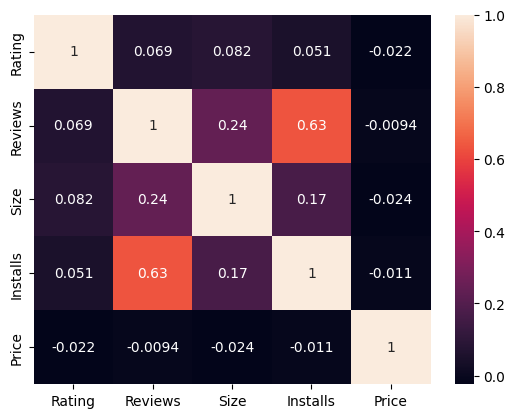

In [53]:
# CORRELATION AMONG THE NUMERICAL COLUMNS

sns.heatmap(data=df_store.corr(numeric_only=True),annot=True)

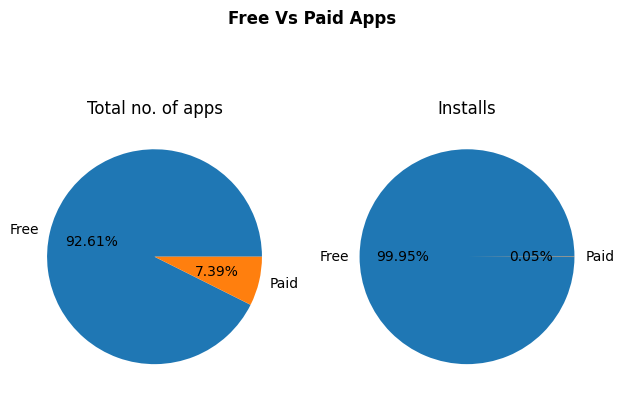

In [54]:
fig, axes = plt.subplots(nrows=1,ncols=2)

_ = df_store['Type'].value_counts()
axes[0].pie(x=_.values,labels=_.index,autopct='%0.2f%%')
axes[0].set_title('Total no. of apps')


_ = df_store.groupby('Type')['Installs'].sum()
axes[1].pie(x=_.values,labels=_.index,autopct='%0.2f%%')
axes[1].set_title('Installs')

fig.suptitle('Free Vs Paid Apps',fontweight='bold')

plt.tight_layout()

<Axes: xlabel='Rating', ylabel='Count'>

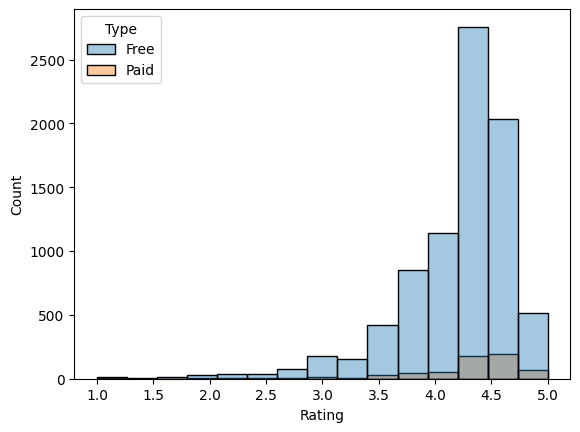

In [55]:
# DISTRIBUTION OF RATINGS FOR FREE AND PAID APPS
sns.histplot(data=df_store,x='Rating',bins=15,hue='Type',alpha=0.4)

In [56]:
print('Average ratings:')
df_store.groupby('Type')['Rating'].mean()

Average ratings:


Type
Free    4.182425
Paid    4.261501
Name: Rating, dtype: float64

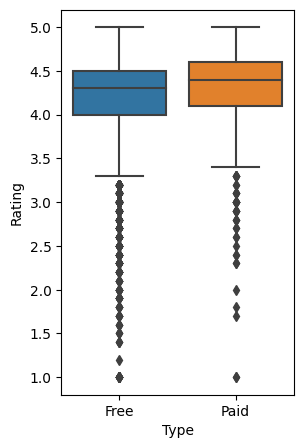

In [57]:
# fig, axes = plt.subplots(nrows=1,ncols=2)

# _ = df_store.groupby('Type')['Rating'].mean()
# # plt.figure(figsize=(4,2))
# sns.barplot(x=_.index,y=_.values,ax=axes[0])
# axes[0].set_ylabel('Average Rating')

plt.figure(figsize=(3,5))
sns.boxplot(data=df_store,x='Type',y='Rating')
# sns.kdeplot(data=df_store,x='Type',y='Rating')

plt.show()

# DISTRIBUTION OF RATINGS OF FREE VS PAID APPS

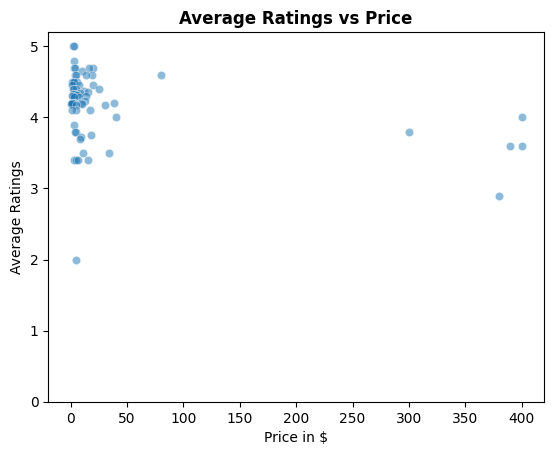

In [58]:
_ = df_store.groupby('Price')['Rating'].mean().sort_values(ascending=False)
sns.scatterplot(x=_.index,y=_.values,alpha=0.5)
# plt.xticks(rotation=90)
plt.ylim(0,5.2)
plt.ylabel('Average Ratings')
plt.xlabel('Price in $')
plt.title('Average Ratings vs Price',fontweight='bold')
plt.show()

# PRICE VS RETURN ?

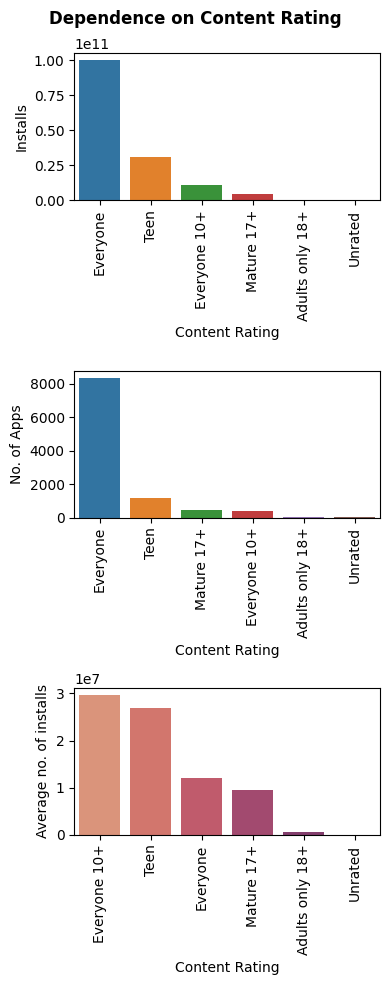

In [59]:
# DEPENDENCE ON CONTENT RATING OF APPS ?

fig, axes = plt.subplots(3,1,figsize=(4,10))        # CREATING SUBPLOTS OF 3 ROWS AND 1 COLUMN
_ = df_store.groupby('Content Rating')['Installs'].sum().sort_values(ascending=False)
sns.barplot(x=_.index,y=_.values,ax=axes[0])
axes[0].set_ylabel('Installs')

_ = df_store['Content Rating'].value_counts()
sns.barplot(x=_.index,y=_.values,ax=axes[1])
axes[1].set_ylabel('No. of Apps')

# AVERAGE NO. OF INSTALLS PER CATEGORY OF CONTENT RATING
_ = (df_store.groupby('Content Rating')['Installs'].sum().sort_index())/(df_store['Content Rating'].value_counts().sort_index())
_ = _.sort_values(ascending=False)
sns.barplot(x=_.index,y=_.values,ax=axes[2],palette='flare')
axes[2].set_ylabel('Average no. of installs')

for ax in axes:
    ax.tick_params(axis='x', rotation=90)

fig.suptitle('Dependence on Content Rating',fontweight='bold')

plt.tight_layout()

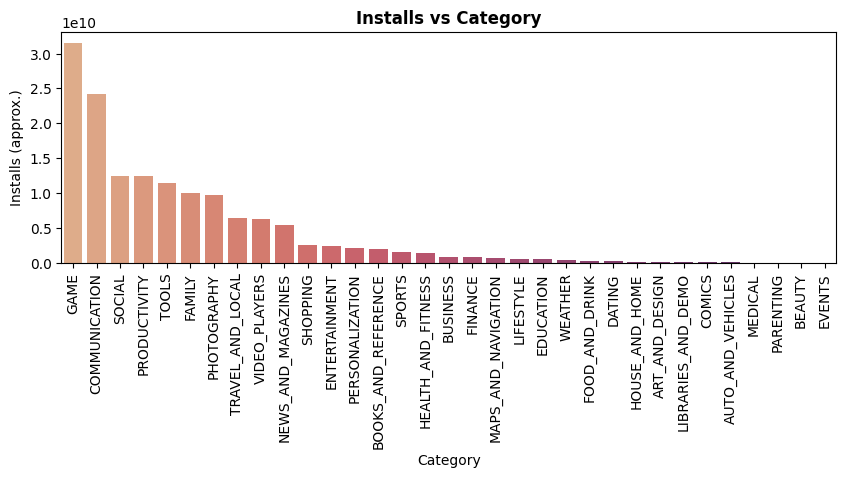

In [60]:
_ = df_store.groupby('Category')['Installs'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,3))
sns.barplot(x=_.index,y=_.values,palette='flare')
plt.xticks(rotation=90)
plt.ylabel('Installs (approx.)')
plt.title('Installs vs Category',fontweight='bold')
plt.show()

In [61]:
print('Categories with most installs:')
_.head(6)

Categories with most installs:


Category
GAME             31544024415
COMMUNICATION    24152276251
SOCIAL           12513867902
PRODUCTIVITY     12463091369
TOOLS            11452771915
FAMILY           10041692505
Name: Installs, dtype: int64

In [62]:
df_store['weighted_rating'] = df_store['Rating']*df_store['Reviews']

# WEIGHTED RATING = RATING * NO. OF REVEIWS

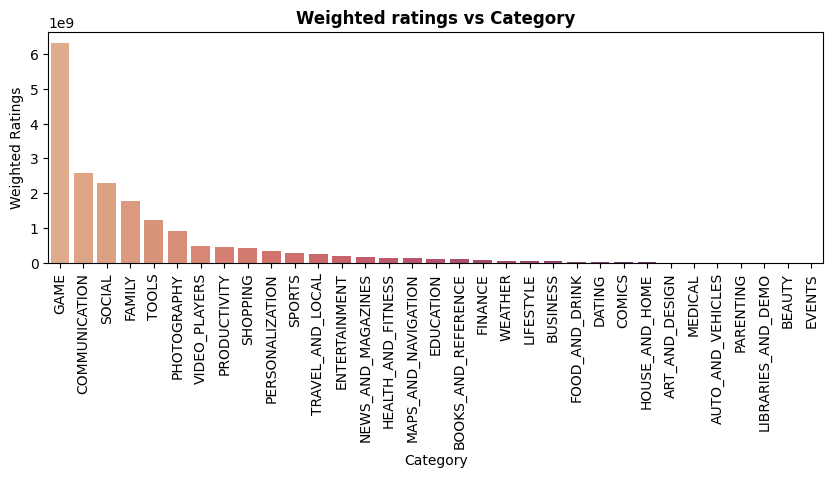

In [63]:
_ = df_store.groupby('Category')['weighted_rating'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,3))
sns.barplot(x=_.index,y=_.values,palette='flare')
plt.xticks(rotation=90)
plt.ylabel('Weighted Ratings')
plt.title('Weighted ratings vs Category',fontweight='bold')
plt.show()

In [64]:
print('Categories with highest weighted ratings:')
_.head(6)

# A NEED FOR BETTER PRODUCTIVITY APPS ?

Categories with highest weighted ratings:


Category
GAME             6.318306e+09
COMMUNICATION    2.575995e+09
SOCIAL           2.283535e+09
FAMILY           1.767361e+09
TOOLS            1.236329e+09
PHOTOGRAPHY      9.048319e+08
Name: weighted_rating, dtype: float64

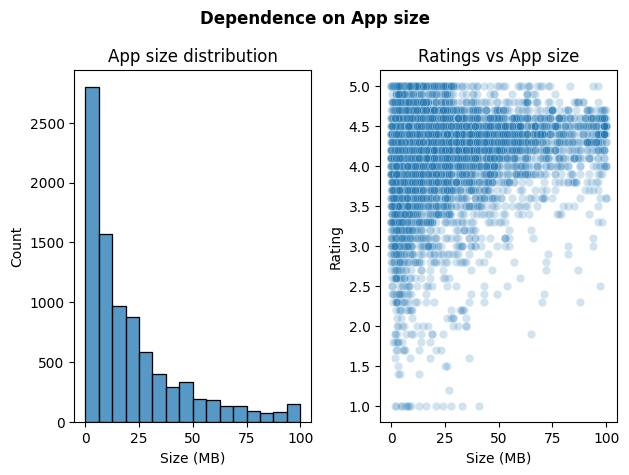

In [65]:

fig,axes = plt.subplots(1,2)        # CREATING SUBPLOTS OF 1 ROW AND 2 COLUMNS

sns.histplot(data=df_store,x='Size',bins=16,ax=axes[0])
axes[0].set_title('App size distribution')
axes[0].set_xlabel('Size (MB)')

sns.scatterplot(data=df_store,x='Size',y='Rating',alpha=0.2,ax=axes[1])
axes[1].set_title('Ratings vs App size')
axes[1].set_xlabel('Size (MB)')

fig.suptitle('Dependence on App size',fontweight='bold')

plt.tight_layout()

Desirable feautures of an application:

- Free or low cost
- Suitable for all ages
- Gaming, communication and social apps generally have higher usage
- Possible need of better productivity apps

There are many aspects that can affect the success of an application. Based on the collected data, we have gained some insight into what makes an app popular. For example, a free app will naturally be more prone to a download and a paid one. On the other hand, paid apps have a slightly better average ratings. But it has also been seen that the rise in ratings is not directly proportional to the rise in price. This is probably because a higher priced app will have much higher expectations from the user.

In relation to categories (or the type of application), it is seen that gaming, social and communication apps tend to do well. This goes in hand with the content rating categories which have the highest average installs. Given that games are the most popular apps in the play store, it is not unusual that apps suitable for ages 10 and above are the most in demand.

Another category which could possibly need some attention would be the productivity apps.Even though they are the fourth highest installed apps, their weighted ratings are actually in 8th position. This could be an indication that the users are not totally satisfied with the available productivity apps in the store.

Thus, keeping these factors in mind, a developer can be in an advantageous position as their application will be more in tune with the demands from users (according to the data collected).